In [1]:
import pandas as pd
import numpy as np
import scipy

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
# Size comes under comparision. So we can convert the size into numeric format.

In [6]:
# First lets check the different values in size.
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
# Since we do not have number of kitchen in separate column, we are free to split the df['size'] into number and the text and
# we will use the number for the training purpose.

In [8]:
# We can see empty size values
df['size'].isnull().sum()

16

In [9]:
# Since, there are only 16 missing size values, we will drop these rows...
df[df['size'].isnull()==True]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [10]:
df.drop(labels=[579,1775,2264,2809,2862,5333,6423,6636,6719,7680,8306,6719,7680,8306,8565,8703,10634,11019,11569],inplace=True)

In [11]:
print(df['size'][0].split(' '))
print(df['size'][0].split(' ')[0])

['2', 'BHK']
2


In [12]:
df['size']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13303 non-null  object 
 3   size          13304 non-null  int64  
 4   society       7805 non-null   object 
 5   total_sqft    13304 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13304 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [15]:
df.shape

(13304, 9)

In [16]:
# Now we have no empty size values.

In [17]:
# You can also see that total squarefeet is object whereas it should be of numeric datatype.
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# You can see that 1133-1384 kind of values are in this column. So, we can take the avg of the two numbers and then replace it
# with the existing value.

In [19]:
def func(x):
    try:
        print(float(x.split('-')[0])+float(x.split('-')[1]))
    except:
        print(float(x))

In [20]:
# You can see that we also have values in Sq. Meter
def func1(x):
    try:
        print(float(x.split('S')[0]))
    except:
        print(float(x))

In [21]:
# First we check for the missing values.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13303 non-null  object 
 3   size          13304 non-null  int64  
 4   society       7805 non-null   object 
 5   total_sqft    13304 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13304 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [23]:
df.shape

(13304, 9)

In [24]:
df['total_sqft'].isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13303 non-null  object 
 3   size          13304 non-null  int64  
 4   society       7805 non-null   object 
 5   total_sqft    13304 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13304 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [26]:
# Lets combine both the functions...but some of the values are in perch,acres,Cents... first we must convert those values into square mts.

In [27]:
def func3(x):
    try:
        try:
            x= (float(x.split('-')[0])+float(x.split('-')[1]))
        except:
            pass
        try:
            x= (float(x.split('S')[0]))
        except:
            pass
        try:
            x= (float(x.split('P')[0])*25.3*10.77)  # Perch to square feet
        except:
            pass
        try:
            x= (float(x.split('A')[0])*4046.9*10.77)  # Acres to square feet
        except:
            pass
        try:
            x= (float(x.split('C')[0])*40.47*10.77)  # Cents to square feet
        except:
            pass
        try:
            x= (float(x.split('G')[0])*101.17*10.77)  # Guntha to square feet
        except:
            pass
    except:
        pass
    return int(x)

In [28]:
df['total_sqft']=df['total_sqft'].apply(func3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13303 non-null  object 
 3   size          13304 non-null  int64  
 4   society       7805 non-null   object 
 5   total_sqft    13304 non-null  int64  
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13304 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [30]:
df['total_sqft'].isnull().sum()

0

In [31]:
# We finally cleaned up the total square feet column.

In [32]:
df.shape

(13304, 9)

In [33]:
# You can see that bath column has null values.

In [34]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [35]:
# I can see that few houses have 10+ bathrooms...Lets check this.

In [36]:
df[df['bath']>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
938,Plot Area,Ready To Move,5th Phase JP Nagar,9,NaN,1260,11.0,NaN,290.0
1078,Plot Area,Ready To Move,BTM 1st Stage,9,Srvasks,3300,14.0,NaN,500.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27,NaN,8000,27.0,0.0,230.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11,NaN,1200,11.0,0.0,170.0
1953,Plot Area,Ready To Move,KR Puram,8,NaN,1200,12.0,NaN,110.0
1979,Plot Area,Ready To Move,Hongasandra,8,NaN,990,12.0,0.0,120.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10,NaN,12000,12.0,NaN,525.0
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19,NaN,2000,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,NaN,10000,16.0,NaN,550.0
4684,Plot Area,Ready To Move,Munnekollal,43,NaN,2400,40.0,0.0,660.0


In [37]:
# Generally number of bathrooms ranges between number of bedrooms +/- 2...So lets filter the ones with greater than that and
# remove them.
df2=df[~((df['size']-df['bath'])>2)]

In [38]:
df2.shape

(13253, 9)

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13253 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13253 non-null  object 
 1   availability  13253 non-null  object 
 2   location      13252 non-null  object 
 3   size          13253 non-null  int64  
 4   society       7805 non-null   object 
 5   total_sqft    13253 non-null  int64  
 6   bath          13196 non-null  float64
 7   balcony       12668 non-null  float64
 8   price         13253 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.0+ MB


In [40]:
df2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 15., 13., 18.])

In [41]:
df2[df2['bath']>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
938,Plot Area,Ready To Move,5th Phase JP Nagar,9,NaN,1260,11.0,NaN,290.0
1078,Plot Area,Ready To Move,BTM 1st Stage,9,Srvasks,3300,14.0,NaN,500.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27,NaN,8000,27.0,0.0,230.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11,NaN,1200,11.0,0.0,170.0
1953,Plot Area,Ready To Move,KR Puram,8,NaN,1200,12.0,NaN,110.0
1979,Plot Area,Ready To Move,Hongasandra,8,NaN,990,12.0,0.0,120.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10,NaN,12000,12.0,NaN,525.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,NaN,10000,16.0,NaN,550.0
4916,Super built-up Area,Ready To Move,1Channasandra,14,NaN,1250,15.0,0.0,125.0
6937,Plot Area,Ready To Move,5th Block Hbr Layout,9,NaN,2600,12.0,NaN,675.0


In [42]:
# You can still see few of them are ambiguous...so lets drop them
df2.drop(index=[1078,1953,1979,6937,8106,10695,13067],inplace=True)

C:\Users\91830\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 27.,
       12., 16., 15., 13., 18.])

In [44]:
# You can see that no. of bathrooms depends on the size of house. So lets check according to it. We can consider that the 
# size in squarefeet of a 2bhk or 3bhk is ideal for the no. of bathrooms. From this we can get the ideal size in squarefeet
# of the house with the number of bathrooms.

In [45]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [46]:
df2.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1,NaN,550,1.0,1.0,17.0


In [47]:
df2.shape

(13246, 9)

In [48]:
# We can see that for every 500 squarefeet of the house we can make a room (assumption). So, if there are more no. of
#bathrooms when compared to the size of the house, we can consider it to be an outlier. We can apply the method using this:
#       total_sqft/size>500 ===> OK
#       else outlier

In [49]:
df3=df2[~((df2['total_sqft']/df2['size'])<500)]

In [50]:
df3.shape

(9251, 9)

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9251 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9251 non-null   object 
 1   availability  9251 non-null   object 
 2   location      9250 non-null   object 
 3   size          9251 non-null   int64  
 4   society       6047 non-null   object 
 5   total_sqft    9251 non-null   int64  
 6   bath          9194 non-null   float64
 7   balcony       8822 non-null   float64
 8   price         9251 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 722.7+ KB


In [52]:
# Now lets check the missing values of the bath column.

In [53]:
df3[df3.bath.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,6420,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,6407,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,3260,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1,PrarePa,525,NaN,NaN,21.530
669,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,11040,NaN,NaN,375.000
702,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,11200,NaN,NaN,548.500
801,Super built-up Area,18-Dec,JP Nagar,4,Pehtsa,9249,NaN,NaN,453.000
941,Super built-up Area,Ready To Move,Whitefield,4,PrOakSi,8697,NaN,NaN,304.000
1264,Built-up Area,18-May,Hennur,3,Asoilul,2264,NaN,NaN,155.000
1267,Super built-up Area,18-Jun,Yelahanka,3,Shalkri,3324,NaN,NaN,67.980


In [54]:
# We have two options, either remove them since they are only 57 values or to fill them according to our prediction 
# by dividing the size in squarefeet with 500 and taking its step value.

In [55]:
# We will drop those rows.

In [56]:
df4=df3.copy()

In [57]:
df4=df4[~(df4.bath.isnull())]

In [58]:
df4.shape

(9194, 9)

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9194 non-null   object 
 1   availability  9194 non-null   object 
 2   location      9193 non-null   object 
 3   size          9194 non-null   int64  
 4   society       5990 non-null   object 
 5   total_sqft    9194 non-null   int64  
 6   bath          9194 non-null   float64
 7   balcony       8822 non-null   float64
 8   price         9194 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 718.3+ KB


In [60]:
df4.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  6.,  7.,  8.,  9., 12., 16., 10.])

In [61]:
df4[df4.bath>8]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
538,Super built-up Area,Ready To Move,Mico Layout,9,Amsomun,5000,9.0,3.0,210.0
648,Built-up Area,Ready To Move,Arekere,9,NaN,1123984,9.0,NaN,265.0
2031,Built-up Area,Ready To Move,Sir M V Nagar,7,NaN,4400,9.0,NaN,120.0
2620,Super built-up Area,Ready To Move,Sathya Sai Layout,6,Prowshi,11338,9.0,1.0,1000.0
2826,Built-up Area,Ready To Move,Kadugodi,9,NaN,6200,9.0,0.0,200.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10,NaN,12000,12.0,NaN,525.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,NaN,10000,16.0,NaN,550.0
3841,Plot Area,Ready To Move,Lakkasandra,9,NaN,4500,9.0,NaN,166.0
4585,Carpet Area,Ready To Move,4th Block Koramangala,9,NaN,4500,9.0,NaN,500.0
4929,Plot Area,18-May,Yemlur,8,Epllan,12000,9.0,NaN,1900.0


In [62]:
# You can see that the row 648 looks ambiguous.
df4.drop(index=648,inplace=True)

In [63]:
df4[df4.bath>8]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
538,Super built-up Area,Ready To Move,Mico Layout,9,Amsomun,5000,9.0,3.0,210.0
2031,Built-up Area,Ready To Move,Sir M V Nagar,7,NaN,4400,9.0,NaN,120.0
2620,Super built-up Area,Ready To Move,Sathya Sai Layout,6,Prowshi,11338,9.0,1.0,1000.0
2826,Built-up Area,Ready To Move,Kadugodi,9,NaN,6200,9.0,0.0,200.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10,NaN,12000,12.0,NaN,525.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,NaN,10000,16.0,NaN,550.0
3841,Plot Area,Ready To Move,Lakkasandra,9,NaN,4500,9.0,NaN,166.0
4585,Carpet Area,Ready To Move,4th Block Koramangala,9,NaN,4500,9.0,NaN,500.0
4929,Plot Area,18-May,Yemlur,8,Epllan,12000,9.0,NaN,1900.0
5847,Super built-up Area,Ready To Move,Vidyaranyapura,9,NaN,4700,10.0,3.0,130.0


In [64]:
df4[df4.total_sqft>100000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1019,Plot Area,18-Mar,Marathi Layout,1,NaN,231436,1.0,0.0,110.0
1086,Plot Area,19-Mar,Narasapura,2,NaN,1307553,2.0,2.0,29.5
7001,Plot Area,Ready To Move,Thyagaraja Nagar,8,NaN,653792,6.0,2.0,290.0
7607,Plot Area,Ready To Move,Bommenahalli,3,Prood G,653776,3.0,1.0,217.0
11615,Plot Area,Ready To Move,arudi,3,NaN,261510,2.0,0.0,80.0


In [65]:
# These values are ambiguous.
df4.drop(index=[1019,1086,7001,7607,11615],inplace=True)

In [66]:
df4.shape

(9188, 9)

In [67]:
df4.shape

(9188, 9)

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9188 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9188 non-null   object 
 1   availability  9188 non-null   object 
 2   location      9187 non-null   object 
 3   size          9188 non-null   int64  
 4   society       5989 non-null   object 
 5   total_sqft    9188 non-null   int64  
 6   bath          9188 non-null   float64
 7   balcony       8817 non-null   float64
 8   price         9188 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 717.8+ KB


In [69]:
# You can see that society column have many missing values and hence can be removed.
df4.drop(columns='society',inplace=True)

In [70]:
# We have to fill in the missing values and change the categorical features into numeric data.

In [71]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,1170,2.0,1.0,38.00


In [72]:
df4.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [73]:
df4[df4.balcony.isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300,4.0,NaN,600.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3,1925,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2,1296,2.0,NaN,81.00
140,Built-up Area,Ready To Move,Hennur Road,8,5000,8.0,NaN,250.00
...,...,...,...,...,...,...,...,...
13164,Super built-up Area,Ready To Move,Sarjapur Road,2,1340,2.0,NaN,75.00
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4,9200,4.0,NaN,2600.00
13232,Super built-up Area,Ready To Move,R.T. Nagar,3,1667,3.0,NaN,130.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3,1675,3.0,NaN,92.13


In [74]:
x=df4[~df4.balcony.isnull()]

In [75]:
x[x.total_sqft<1000]['balcony'].mean()

0.8676789587852495

In [76]:
x[x.total_sqft<1000][x.balcony>2]

C:\Users\91830\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,area_type,availability,location,size,total_sqft,bath,balcony,price
7088,Built-up Area,Ready To Move,Srirampuram,1,650,1.0,3.0,500.0
13305,Carpet Area,Ready To Move,Hulimavu,1,500,1.0,3.0,220.0


In [77]:
# These datapoints look like outliers...Lets remove them (Because, we got the avg. nearly one)
df4.drop(labels=[7088,13305],inplace=True)

In [78]:
x[x.total_sqft>1000][x.total_sqft<2000]['balcony'].mean()

C:\Users\91830\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1.640135739626716

In [79]:
import seaborn as sns

In [80]:
# From, this we can say that most of the houses have two balconies.
df4['balcony'].fillna(df4['balcony'].median(),inplace=True)

In [81]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9186 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9186 non-null   object 
 1   availability  9186 non-null   object 
 2   location      9185 non-null   object 
 3   size          9186 non-null   int64  
 4   total_sqft    9186 non-null   int64  
 5   bath          9186 non-null   float64
 6   balcony       9186 non-null   float64
 7   price         9186 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 645.9+ KB


In [82]:
# Now we have filled the missing columns of the balcony column.

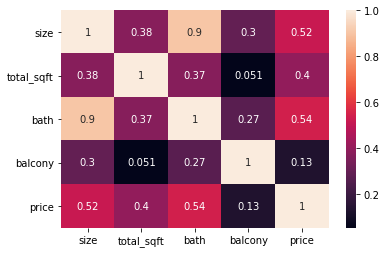

In [83]:
sns.heatmap(df4.corr(),annot=True)

# Correlation chart :
<img src='a.png' width=500>

In [84]:
# I will be removing the columns with correlation greater than 0.87

In [85]:
# Hence, I will be removing the bath column.
df4.drop(columns=['bath'],inplace=True)

In [86]:
# Now we will convert the categorical data into numeric data...
# Method1: Dummy Variables (Note that since it increases dimensionality of the data, if there are many categorical values which
# are likely to be repeated not very often, you can group them into one column and name it 'Other').
# Method2: Target Encoding
# Method3: Leave-one-out-encoding (Performs better than Target Encoding)

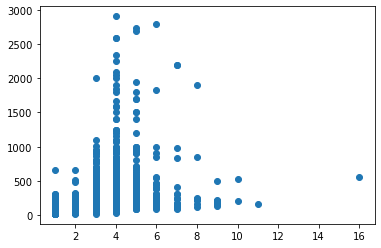

In [87]:
import matplotlib.pyplot as plt
plt.scatter(df4['size'],df4['price'])

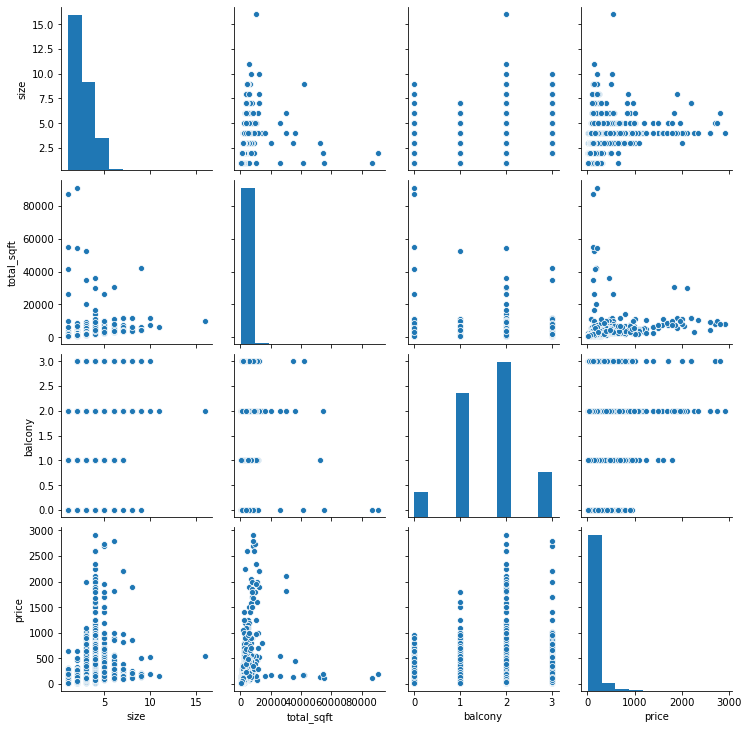

In [88]:
sns.pairplot(df4)

In [89]:
df4[df4['size']==16]

,area_type,availability,location,size,total_sqft,balcony,price
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,10000,2.0,550.0


In [90]:
# This looks like an outlier, lets remove it.
df4.drop(labels=3609,inplace=True)

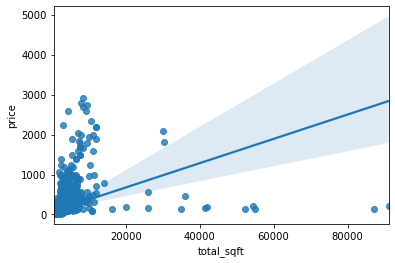

In [91]:
sns.regplot('total_sqft','price',data=df4)

In [92]:
df4.drop(labels=6421,inplace=True)

In [93]:
# We will do the first method to convert the target variables and try to decrease its dimensions by converting few of them
# into 'other' column. We will use this method for location column.

In [94]:
df4_loc=pd.get_dummies(df4['location'],drop_first=True)

In [95]:
df4.head()

,area_type,availability,location,size,total_sqft,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,1170,1.0,38.00


In [96]:
df5=pd.concat([df4.drop(columns='location'),df4_loc],axis='columns')

In [97]:
df5.shape,df4.shape

((9184, 1030), (9184, 7))

In [98]:
# You can see that the number of columns has increased enormously. So, lets reduce the number of columns.

In [99]:
pd.set_option('display.max_columns',None)
df4_loc

Basavangudi   Devarabeesana Halli   Devarachikkanahalli  \
0                 0                     0                     0   
1                 0                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   
5                 0                     0                     0   
...             ...                   ...                   ...   
13315             0                     0                     0   
13316             0                     0                     0   
13317             0                     0                     0   
13318             0                     0                     0   
13319             0                     0                     0   

        Electronic City   Mysore Highway   Rachenahalli   Sector 1 HSR Layout  \
0                     0                0              0                     0   
1                     0                0              0                     0   
3                     0                0              0                     0   
4                     0                0              0                     0   
5                     0                0              0                     0   
...                 ...              ...            ...                   ...   
13315                 0                0              0                     0   
13316                 0                0              0                     0   
13317                 0                0              0                     0   
13318                 0                0              0                     0   
13319                 0                0              0                     0   

        Thanisandra   Whitefield   south  1 Immadihalli  \
0                 0            0       0              0   
1                 0            0       0              0   
3                 0            0       0              0   
4                 0            0       0              0   
5                 0            0       0              0   
...             ...          ...     ...            ...   
13315             0            0       0              0   
13316             0            0       0              0   
13317             0            0       0              0   
13318             0            0       0              0   
13319             0            0       0              0   

       12th cross srinivas nagar banshankari 3rd stage  1A Block Koramangala  \
0                                                    0                     0   
1                                                    0                     0   
3                                                    0                     0   
4                                                    0                     0   
5                                                    0                     0   
...                                                ...                   ...   
13315                                                0                     0   
13316                                                0                     0   
13317                                                0                     0   
13318                                                0                     0   
13319                                                0                     0   

       1st Block BEL Layout  1st Block HBR Layout  1st Block HRBR Layout  \
0                         0                     0                      0   
1                         0                     0                      0   
3                         0                     0                      0   
4                         0                     0                      0   
5                         0                     0                      0   
...                     ...                   ...                    ...   
13315                     0 

In [100]:
# You can see that there are locations which contains only one house out of 1038 locations.
df4_loc.sum().sort_values(ascending=False)

Whitefield                467
Sarjapur  Road            307
Electronic City           204
Thanisandra               192
Yelahanka                 174
                         ... 
Nobo Nagar                  1
Devasandra Extension        1
Near ullas theater          1
Near Electronic City,       1
 Basavangudi                1
Length: 1024, dtype: int64

In [101]:
# You can see that there are many locations with only one house. So lets group all the locations with less than 10 houses.

In [102]:
(df4_loc.sum()<10).sum()

841

In [103]:
df4_loc.sum()

 Basavangudi                            1
 Devarabeesana Halli                    6
 Devarachikkanahalli                    8
 Electronic City                        1
 Mysore Highway                         3
                                       ..
ravindra nagar, T.dasarahalli peenya    1
rr nagar                                1
sapthagiri Layout                       1
sarjapura main road                     1
tc.palya                                2
Length: 1024, dtype: int64

In [104]:
# We can group the  columns into the other column by taking the sum of rows.

In [105]:
for i,var in (df4_loc.sum()).items():
    print(f'i: {i}    var:{var}  data_type:{type(i)}')

i:  Basavangudi    var:1  data_type:<class 'str'>
i:  Devarabeesana Halli    var:6  data_type:<class 'str'>
i:  Devarachikkanahalli    var:8  data_type:<class 'str'>
i:  Electronic City    var:1  data_type:<class 'str'>
i:  Mysore Highway    var:3  data_type:<class 'str'>
i:  Rachenahalli    var:1  data_type:<class 'str'>
i:  Sector 1 HSR Layout    var:1  data_type:<class 'str'>
i:  Thanisandra    var:2  data_type:<class 'str'>
i:  Whitefield    var:1  data_type:<class 'str'>
i:  south    var:2  data_type:<class 'str'>
i: 1 Immadihalli    var:1  data_type:<class 'str'>
i: 12th cross srinivas nagar banshankari 3rd stage    var:1  data_type:<class 'str'>
i: 1A Block Koramangala    var:1  data_type:<class 'str'>
i: 1st Block BEL Layout    var:1  data_type:<class 'str'>
i: 1st Block HBR Layout    var:3  data_type:<class 'str'>
i: 1st Block HRBR Layout    var:2  data_type:<class 'str'>
i: 1st Block Jayanagar    var:9  data_type:<class 'str'>
i: 1st Block Koramangala    var:8  data_type:<cla

In [106]:
columns_less_than_10=[]
for i,var in (df4_loc.sum()).items():
    if var<10:
        columns_less_than_10.append(i)
        #print(i)

In [107]:
len(columns_less_than_10)

841

In [108]:
data=[]
for key,value in ((df4_loc[columns_less_than_10].sum(axis=1)).items()):
    #print(f"key:{key}   value:{value}")
    data.append(value)

In [109]:
other_df=pd.DataFrame()
other_df['Other']=data

In [110]:
other_df

,Other
0,0
1,0
2,0
3,0
4,0
...,...
9179,0
9180,1
9181,0
9182,0


In [111]:
df4_loc=df4_loc.drop(columns=columns_less_than_10)

In [112]:
df4_loc['Other']=data

In [113]:
df4_loc

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dairy Circle,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddakallasandra,Doddathoguru,Dodsworth Layout,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kalena Agrahara,Kalyan nagar,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kasturi Nagar,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodihalli,Kogilu,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagavara,Nagavarapalya,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sadashiva Nagar,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [114]:
df4.head()

,area_type,availability,location,size,total_sqft,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,1170,1.0,38.00


In [115]:
df4.drop(columns='location',inplace=True)

In [116]:
df5=pd.concat([df4,df4_loc],axis='columns')

In [117]:
df5

,area_type,availability,size,total_sqft,balcony,price,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dairy Circle,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddakallasandra,Doddathoguru,Dodsworth Layout,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kalena Agrahara,Kalyan nagar,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kasturi Nagar,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodihalli,Kogilu,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagavara,Nagavarapalya,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sadashiva Nagar,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Other
0,Super built-up Area,19-Dec,2,1056,1.0,39.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,4,2600,3.0,120.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,3,1521,1.0,95.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,2,1200,1.0,51.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [118]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9184 entries, 0 to 13319
Columns: 190 entries, area_type to Other
dtypes: float64(2), int64(3), object(2), uint8(183)
memory usage: 2.2+ MB


In [119]:
df5.isnull().sum().sum()

0

In [120]:
# Now we have a cleaned dataset.

In [121]:
df5.columns

Index(['area_type', 'availability', 'size', 'total_sqft', 'balcony', 'price',
       '1st Phase JP Nagar', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'Other'],
      dtype='object', length=190)

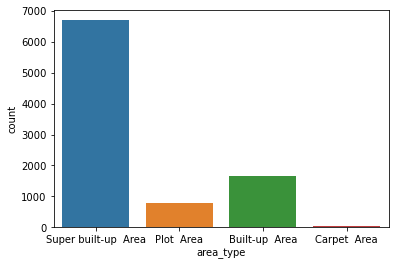

In [122]:
sns.countplot(df5['area_type'])

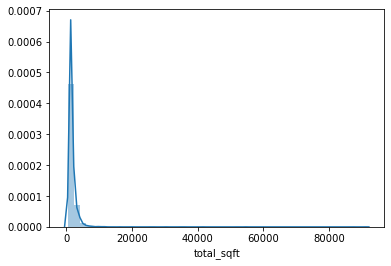

In [123]:
sns.distplot(df5['total_sqft'])

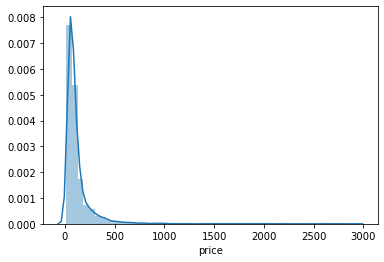

In [124]:
sns.distplot(df5['price'])

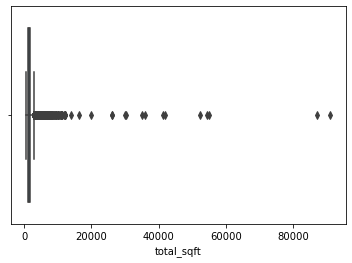

In [125]:
sns.boxplot(df5['total_sqft'])

In [126]:
df5.shape

(9184, 190)

In [127]:
# Lets remove the outliers

In [128]:
Q1=np.percentile(df5['total_sqft'],25)
Q2=np.percentile(df5['total_sqft'],75)
IQR=Q2-Q1
# Lets take the outer-constraints...For that we multiply IQR with 1.5 and then subtract with 25 percentile and add with 75 
# percentile
value=IQR*1.5
min_=Q1-value
max_=Q2+value
df6=df5.copy()
df6=df6[(df6['total_sqft']>min_) & (df6['total_sqft']<max_)]

In [129]:
# Similarly, we do this for the price column
Q1=np.percentile(df6['price'],25)
Q2=np.percentile(df6['price'],75)
IQR=Q2-Q1
# Lets take the outer-constraints...For that we multiply IQR with 1.5 and then subtract with 25 percentile and add with 75 
# percentile
value=IQR*1.5
min_=Q1-value
max_=Q2+value
df6=df6[(df6['price']>min_) & (df6['price']<max_)]

In [130]:
#df6=df5.copy()
df6.shape

(7740, 190)

In [131]:
# Now we have removed the outliers

In [132]:
# Lets assume that our model does not depend on the availability column

In [133]:
df6.drop(columns=['availability'],inplace=True)

In [134]:
df6=pd.get_dummies(df6,drop_first=True)

In [135]:
df6.head()

,size,total_sqft,balcony,price,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dairy Circle,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddakallasandra,Doddathoguru,Dodsworth Layout,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kalena Agrahara,Kalyan nagar,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kasturi Nagar,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodihalli,Kogilu,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagavara,Nagavarapalya,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sadashiva Nagar,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2,1056,1.0,39.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4,2600,3.0,120.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1521,1.0,95.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,1200,1.0,51.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [136]:
# You can also check whether the prices of the houses with smaller size is greater than the houses with larger sizes and remove
# them.

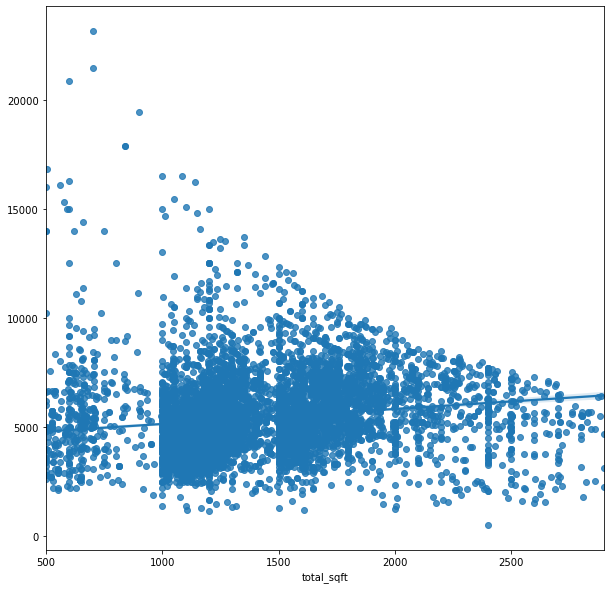

In [137]:
plt.figure(figsize=[10,10])
sns.regplot(df6['total_sqft'],df6['price']/df6['total_sqft']*100000)

In [138]:
df6['price_per_sqft']=((df6['price']/df6['total_sqft'])*100000)

In [139]:
df6.head()

,size,total_sqft,balcony,price,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dairy Circle,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddakallasandra,Doddathoguru,Dodsworth Layout,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kalena Agrahara,Kalyan nagar,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kasturi Nagar,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodihalli,Kogilu,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagavara,Nagavarapalya,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sadashiva Nagar,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price_per_sqft
0,2,1056,1.0,39.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3699.810606
1,4,2600,3.0,120.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4615.384615
3,3,1521,1.0,95.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6245.890861
4,2,1200,1.0,51.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

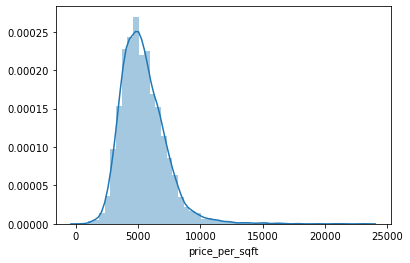

In [140]:
sns.distplot(df6['price_per_sqft'])

In [141]:
# Now, we split the data into X and y and then split them into training and testing data and later train the model.

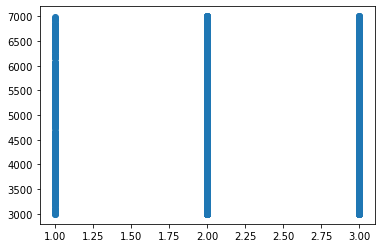

In [142]:
df6=df6[~(df6['size']>3)]
df6=df6[~(df6['price_per_sqft']>7000) & ~(df6['price_per_sqft']<3000)]
plt.scatter(df6['size'],df6['price_per_sqft'])

In [143]:
X=df6.drop(columns=['price','price_per_sqft'])
y=df6['price']

In [144]:
# Feature Scaling:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25)

In [147]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [148]:
# The results with random forests and gradient boosting are worst.

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [173]:
model_params={
    'linear':{
        'model':LinearRegression(n_jobs=-1),
        'params':{'normalize':[True,False]}
    },
    'Lasso':{
        'model':Lasso(),
        'params':{'alpha':[0.5,1]}
    },
    'Ridge':{
        'model':Ridge(),
        'params':{'alpha':[0.05,0.1,0.5,1],'normalize':[True,False]}
    }
}

In [174]:
scores=[]
for i,j in model_params.items():
    rscv=GridSearchCV(estimator=j['model'],param_grid=j['params'])
    rscv.fit(X_train,y_train)
    scores.append({
        'model_name':i,
        'Best_score':rscv.best_score_,
        'Best_Estimator':rscv.best_estimator_
    })

In [175]:
scores

[{'model_name': 'linear',
  'Best_score': -5.141487854205154e+21,
  'Best_Estimator': LinearRegression(n_jobs=-1)},
 {'model_name': 'Lasso',
  'Best_score': 0.6872616627664423,
  'Best_Estimator': Lasso(alpha=0.5)},
 {'model_name': 'Ridge',
  'Best_score': 0.7554964496479647,
  'Best_Estimator': Ridge(alpha=1)}]

In [176]:
# You can see that our model performs with 75% accuracy.

In [177]:
reg=Ridge()
reg.fit(X_train,y_train)

Ridge()

In [178]:
reg.score(X_test,y_test)

0.7606233568332456

In [179]:
# Now we need to store the columns in a Json file

In [180]:
import json

In [184]:
columns={
    'columns':[i.lower() for i in X.columns]
}

In [185]:
columns

{'columns': ['size',
  'total_sqft',
  'balcony',
  '1st phase jp nagar',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'ardendale',
  'arekere',
  'attibele',
  'btm 2nd stage',
  'babusapalaya',
  'balagere',
  'banashankari',
  'banashankari stage iii',
  'banaswadi',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'billekahalli',
  'binny pete',
  'bommanahalli',
  'bommasandra',
  'bommasandra industrial area',
  'brookefield',
  'budigere',
  'cv raman nagar',
  'chandapura',
  'channasandra',
  'chikka tirupathi',
  'chikkalasandra',
  'choodasandra',
  'cooke town',
  'cox town',
  'cunningham road',
  'dairy circle',
  'dasarahalli'

In [187]:
with open('columns.json',mode='w') as f:
    f.write(json.dumps(columns))